In [1]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6aee753db59699203c12cf7277c2a21b5af936ab74cbbc9f39f452043bb11dcf
  Stored in directory: /Users/macisekander/Library/Caches/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf 
import numpy as np 
import ta
import pandas as pd

### A Bollinger Band consists of a middle band (which is a moving average) and an upper and lower band. These upper and lower bands are set above and below the moving average by a certain number of standard deviations of price, thus incorporating volatility.

In [50]:
df = yf.download('AAPL', start='2015-01-01',end='2023-12-31')


[*********************100%%**********************]  1 of 1 completed


In [51]:
df.Close = df['Adj Close']

In [52]:
def applyindicators(df):
    df['SMA_200'] = df.Close.rolling(200).mean()#200 day simple moving average new column. 
    #Rolling over close column caluclating simple moving average over 200 days
    df['SMA_20'] = df.Close.rolling(20).mean()
    df['stddev'] = df.Close.rolling(20).std()#creating a standard deviation column
    df['Upper'] = df.SMA_20 + 2.5 * df.stddev#finding upper band for bollinger band
    df['Lower'] = df.SMA_20 - 2.5 * df.stddev#finding lower band 
    df['rsi'] = ta.momentum.rsi(df.Close,2)#RSI a volume indicator 

In [53]:
applyindicators(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi
Date,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,24.435268,24.435268,212818400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,23.746889,23.746889,257142000,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-06,26.635000,26.857500,26.157499,23.749121,23.749121,263188400,NaN,NaN,NaN,NaN,NaN,0.644186
2015-01-07,26.799999,27.049999,26.674999,24.082134,24.082134,160423600,NaN,NaN,NaN,NaN,NaN,66.004226
2015-01-08,27.307501,28.037500,27.174999,25.007435,25.007435,237458000,NaN,NaN,NaN,NaN,NaN,92.698024
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.353287,193.353287,37122800,178.049737,193.421689,2.907306,200.689954,186.153423,8.488248
2023-12-26,193.610001,193.889999,192.830002,192.803986,192.803986,28919300,178.275199,193.584482,2.766750,200.501357,186.667607,5.454309
2023-12-27,192.490005,193.500000,191.089996,192.903839,192.903839,48087700,178.491363,193.721806,2.653539,200.355653,187.087960,16.327441


<Axes: xlabel='Date'>

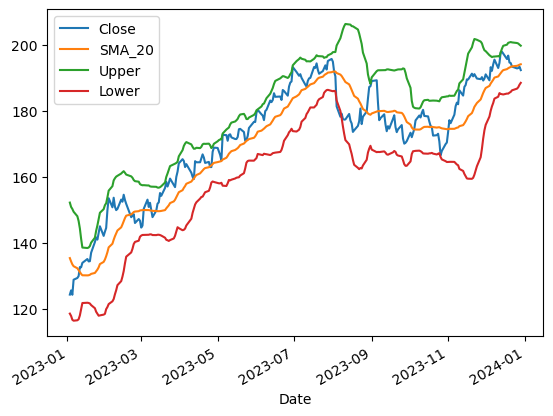

In [54]:
df.tail(250)[['Close','SMA_20','Upper','Lower']].plot()

In [55]:
def conditions(df):
    df['Buy'] = np.where((df.Close>df.SMA_200)&
                        (df.Close<df.Lower)&
                         (0.97 * df.Close >= df.Low.shift(-1)),1,0)#checking if on the next day the low is below or equal to todays close price
                        #1 either buy or 0 for sell
    df['Sell'] = np.where((df.rsi>50),1,0)
    
    df['Buyprice'] = 0.97 * df.Close # as we are placing 3% buy limit order buy price will always be 97% of my close price
    df['Sellprice'] = df.Open.shift(-1)#taking the next days open

In [56]:
conditions(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,24.435268,24.435268,212818400,NaN,NaN,NaN,NaN,NaN,NaN,0,0,23.702210,27.072500
2015-01-05,27.072500,27.162500,26.352501,23.746889,23.746889,257142000,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,23.034482,26.635000
2015-01-06,26.635000,26.857500,26.157499,23.749121,23.749121,263188400,NaN,NaN,NaN,NaN,NaN,0.644186,0,0,23.036647,26.799999
2015-01-07,26.799999,27.049999,26.674999,24.082134,24.082134,160423600,NaN,NaN,NaN,NaN,NaN,66.004226,0,1,23.359670,27.307501
2015-01-08,27.307501,28.037500,27.174999,25.007435,25.007435,237458000,NaN,NaN,NaN,NaN,NaN,92.698024,0,1,24.257212,28.167500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.353287,193.353287,37122800,178.049737,193.421689,2.907306,200.689954,186.153423,8.488248,0,0,187.552688,193.610001
2023-12-26,193.610001,193.889999,192.830002,192.803986,192.803986,28919300,178.275199,193.584482,2.766750,200.501357,186.667607,5.454309,0,0,187.019866,192.490005
2023-12-27,192.490005,193.500000,191.089996,192.903839,192.903839,48087700,178.491363,193.721806,2.653539,200.355653,187.087960,16.327441,0,0,187.116724,194.139999


In [57]:
Buy_Sells = df[(df.Buy==1)|(df.Sell==1)]

In [58]:
Buy_Sells.tail(282)#shows us either sell or buy in the Buy or Sell column 

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2021-11-23,161.119995,161.800003,159.059998,159.383224,159.383224,96041900,135.845985,150.326694,4.301377,161.080136,139.573252,99.690726,0,1,154.601728,160.750000
2021-11-24,160.750000,162.139999,159.639999,159.906586,159.906586,69463600,135.980171,150.983687,4.712822,162.765742,139.201631,99.796036,0,1,155.109388,159.570007
2021-11-29,159.369995,161.190002,158.789993,158.227905,158.227905,88748200,136.216198,151.730225,4.958529,164.126546,139.333903,59.809697,0,1,153.481068,159.990005
2021-11-30,159.990005,165.520004,159.919998,163.224396,163.224396,174048100,136.377785,152.547684,5.440264,166.148345,138.947024,84.453665,0,1,158.327664,167.479996
2021-12-01,167.479996,170.300003,164.529999,162.701050,162.701050,152052500,136.548303,153.286718,5.772386,167.717684,138.855752,74.840236,0,1,157.820018,158.740005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,195.089996,198.000000,194.850006,197.707718,197.707718,70404200,176.428173,191.382291,2.525554,197.696175,185.068406,86.538026,0,1,191.776486,198.020004
2023-12-14,198.020004,199.619995,196.160004,197.857529,197.857529,66831600,176.694768,191.886648,2.762392,198.792627,184.980669,87.290378,0,1,191.921803,197.529999
2023-12-15,197.529999,198.399994,197.000000,197.318222,197.318222,128256700,176.955682,192.279147,2.951873,199.658830,184.899463,62.244501,0,1,191.398675,196.089996


In [59]:
matched = Buy_Sells[(Buy_Sells.Buy.diff()==1)|(Buy_Sells.Sell.diff()==1)]

In [60]:
matched#know we can see the buy and selling in the buy and sell columns

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2020-02-27,70.275002,71.500000,68.239998,66.691002,66.691002,320605600,58.585140,76.434764,3.548373,85.305697,67.563831,8.931124,1,0,64.690272,64.315002
2020-03-02,70.570000,75.360001,69.430000,72.857315,72.857315,341397200,58.824151,75.706820,4.169513,86.130602,65.283039,80.994138,0,1,70.671596,75.917503


In [61]:
def matchtrades(df):
    Buy_Sells = df[(df.Buy==1)|(df.Sell==1)]
    matched_Buy_Sells = Buy_Sells[(Buy_Sells.Buy.diff()==1)|(Buy_Sells.Sell.diff()==1)]
    return matched_Buy_Sells

In [62]:
trades = matchtrades(df)
trades

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2020-02-27,70.275002,71.500000,68.239998,66.691002,66.691002,320605600,58.585140,76.434764,3.548373,85.305697,67.563831,8.931124,1,0,64.690272,64.315002
2020-03-02,70.570000,75.360001,69.430000,72.857315,72.857315,341397200,58.824151,75.706820,4.169513,86.130602,65.283039,80.994138,0,1,70.671596,75.917503


In [63]:
profit = (trades.Sellprice.shift(-1) - trades.Buyprice)/trades.Buyprice

In [64]:
profit = profit[::2] #skipping every 2nd value so no NaN values 
profit #made 17% on that trade

Date
2020-02-27    0.173554
dtype: float64

# That was for a single stock this time we will do this on Russle 1,000 stocks 

In [65]:
#1. Getting daily stock price data for the last couple of years for all 1,000 russle stocks 
#2. Storing the prices in a DataBase 
#Database is good because there is a large amount of data here 

In [66]:
import yfinance as yf 
from sqlalchemy import create_engine 
import pandas as pd 

In [89]:
engine = create_engine('sqlite:///RaynerDB.db')

In [90]:
symbols = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')[2]

In [91]:
symbols=symbols.Ticker.to_list()

In [92]:
symbols

['TXG',
 'MMM',
 'ABT',
 'ABBV',
 'ACHC',
 'ACN',
 'AYI',
 'ADM',
 'ADBE',
 'ADP',
 'ADT',
 'AAP',
 'WMS',
 'ACM',
 'AES',
 'AFRM',
 'AFL',
 'AGCO',
 'A',
 'AGL',
 'ADC',
 'AGNC',
 'AIG',
 'AL',
 'APD',
 'ABNB',
 'AKAM',
 'ALK',
 'ALB',
 'ACI',
 'AA',
 'ARE',
 'ALGN',
 'ALLE',
 'ALGM',
 'LNT',
 'ALSN',
 'ALL',
 'ALLY',
 'ALNY',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMC',
 'AMCR',
 'AMD',
 'DOX',
 'AMED',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AFG',
 'AMH',
 'AMT',
 'AWK',
 'COLD',
 'AMP',
 'AME',
 'AMG',
 'AMGN',
 'APH',
 'ADI',
 'NLY',
 'ANSS',
 'AM',
 'AR',
 'AON',
 'APA',
 'AIRC',
 'APLS',
 'APO',
 'AAPL',
 'AMAT',
 'APP',
 'ATR',
 'APTV',
 'ARMK',
 'ACGL',
 'AMBP',
 'ARES',
 'ANET',
 'AWI',
 'ARW',
 'AJG',
 'ASH',
 'AZPN',
 'AIZ',
 'AGO',
 'T',
 'TEAM',
 'ATO',
 'ADSK',
 'AN',
 'AZO',
 'AVB',
 'AGR',
 'AVTR',
 'AVY',
 'CAR',
 'AVT',
 'AXTA',
 'AXS',
 'AXON',
 'AZEK',
 'AZTA',
 'BKR',
 'BALL',
 'BAC',
 'OZK',
 'BBWI',
 'BAX',
 'BDX',
 'BSY',
 'WRB',
 'BRK.B',
 'BERY',
 'BBY',
 'BILL',
 'B

In [93]:
for symbol in symbols:
    df=yf.download(symbol,start='2015-01-01',end='2021-12-31')
    df.to_sql(symbol,engine)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [94]:
df = pd.read_sql('AAPL',engine)#we can use any ticker in the russle 1000 cause we have stored it into a database

In [95]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435278,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746893,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749125,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082140,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000
...,...,...,...,...,...,...,...
1757,2021-12-23,175.850006,176.850006,175.270004,176.279999,174.066498,68356600
1758,2021-12-27,177.089996,180.419998,177.070007,180.330002,178.065659,74919600
1759,2021-12-28,180.160004,181.330002,178.529999,179.289993,177.038696,79144300
1760,2021-12-29,179.330002,180.630005,178.139999,179.380005,177.127594,62348900


In [100]:
for symbol in symbols[:3]:#giving us the first 3 in the database
    df = pd.read_sql(symbol,engine)
    print(df)
    print(symbol)

          Date        Open        High         Low       Close   Adj Close  \
0   2019-09-12   54.000000   58.000000   51.000000   52.750000   52.750000   
1   2019-09-13   52.750000   54.355000   49.150002   52.270000   52.270000   
2   2019-09-16   52.450001   56.000000   52.009998   55.200001   55.200001   
3   2019-09-17   56.209999   60.900002   55.423000   56.779999   56.779999   
4   2019-09-18   56.849998   62.270000   55.650002   62.000000   62.000000   
..         ...         ...         ...         ...         ...         ...   
576 2021-12-23  146.869995  147.009995  143.160004  146.089996  146.089996   
577 2021-12-27  145.279999  149.000000  143.130005  144.449997  144.449997   
578 2021-12-28  144.619995  148.360001  143.261002  144.550003  144.550003   
579 2021-12-29  144.820007  146.360001  143.710007  144.729996  144.729996   
580 2021-12-30  144.139999  153.184998  143.860001  150.880005  150.880005   

      Volume  
0    7326300  
1    1025200  
2     269900  
3  

## Know for the actually backtest


In [101]:
import yfinance as yf 
from sqlalchemy import create_engine 
import pandas as pd 
import ta

In [102]:
engine = create_engine('sqlite:///RaynerDB.db')

In [104]:
symbols = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')[2].Ticker.to_list()

In [105]:
def applyindicators(df):
    df['SMA_200'] = df.Close.rolling(200).mean()#200 day simple moving average new column. 
    #Rolling over close column caluclating simple moving average over 200 days
    df['SMA_20'] = df.Close.rolling(20).mean()
    df['stddev'] = df.Close.rolling(20).std()#creating a standard deviation column
    df['Upper'] = df.SMA_20 + 2.5 * df.stddev#finding upper band for bollinger band
    df['Lower'] = df.SMA_20 - 2.5 * df.stddev#finding lower band 
    df['rsi'] = ta.momentum.rsi(df.Close,2)#RSI a volume indicator 

In [106]:
def conditions(df):
    df['Buy'] = np.where((df.Close>df.SMA_200)&
                        (df.Close<df.Lower)&
                         (0.97 * df.Close >= df.Low.shift(-1)),1,0)#checking if on the next day the low is below or equal to todays close price
                        #1 either buy or 0 for sell
    df['Sell'] = np.where((df.rsi>50),1,0)
    
    df['Buyprice'] = 0.97 * df.Close # as we are placing 3% buy limit order buy price will always be 97% of my close price
    df['Sellprice'] = df.Open.shift(-1)#taking the next days open

In [107]:
def matchtrades(df):
    Buy_Sells = df[(df.Buy==1)|(df.Sell==1)]
    matched_Buy_Sells = Buy_Sells[(Buy_Sells.Buy.diff()==1)|(Buy_Sells.Sell.diff()==1)]
    return matched_Buy_Sells

In [109]:
tradeslist = []#storing all the excuted trades

for symbol in symbols:
    df = pd.read_sql(symbol,engine,index_col='Date')
    df.Close = df['Adj Close']
    applyindicators(df)
    conditions(df)
    trades = matchtrades(df)
    tradeslist.append(trades)

In [112]:
tradesdf=pd.concat(tradeslist)
tradesdf

/var/folders/zb/vpw92n0d5bv845zdvgct5lnm0000gn/T/ipykernel_1179/4081686722.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  tradesdf=pd.concat(tradeslist)


,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2021-03-04,171.550003,173.664993,146.380005,147.399994,147.399994,1418500.0,129.457475,182.029498,10.292117,207.759791,156.299206,4.263410,1,0,142.977994,152.009995
2021-03-09,146.369995,152.899994,145.350006,150.610001,150.610001,999600.0,130.532875,176.939499,15.968389,216.860471,137.018527,50.860523,0,1,146.091701,155.000000
2016-01-07,226.119995,229.610001,222.990005,217.533310,217.533310,611800.0,190.079414,227.570806,3.750807,236.947822,218.193790,7.312757,1,0,211.007311,223.000000
2016-01-14,199.509995,208.830002,199.460007,201.167801,201.167801,535600.0,191.065238,221.495445,12.543843,252.855052,190.135838,54.755649,0,1,195.132767,203.100006
2018-02-08,192.839996,192.970001,185.020004,185.160004,185.160004,3978700.0,159.881300,195.575999,4.049168,205.698920,185.453079,10.720377,1,0,179.605204,187.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02,56.220001,57.639999,55.310001,57.110001,57.110001,1516800.0,50.106325,60.874500,2.659340,67.522849,54.226150,63.352043,0,1,55.396701,57.349998
2019-08-08,42.630001,44.130001,39.650002,42.139999,42.139999,14985500.0,38.384825,48.582500,1.768413,53.003532,44.161469,8.478111,1,0,40.875799,41.720001
2019-08-16,34.580002,36.040001,34.549999,35.939999,35.939999,2950600.0,38.293250,44.925500,6.019481,59.974203,29.876797,58.376500,0,1,34.861799,36.360001


In [114]:
tradesdf['profit'] = (tradesdf.Sellprice.shift(-1) - tradesdf.Buyprice)/tradesdf.Buyprice


In [120]:
frame = pd.DataFrame({'profit':tradesdf[::2].profit.values,
                     'Buydates':tradesdf[::2].index,
                    'Selldates':tradesdf[::2].index})#[::2]just using every second row

In [123]:
sorted_df=frame.sort_values(by='Buydates') #made a new dataframe so cleaner 

In [125]:
sorted_df = sorted_df.set_index('Buydates',drop=False)

In [129]:
(sorted_df.profit+1).cumprod()

Buydates
2015-11-11    1.020198
2015-11-13    1.088613
2015-12-11    1.236221
2016-01-05    1.280193
2016-01-06    1.314437
                ...   
2021-12-01    2.233384
2021-12-03    2.385710
2021-12-03    2.670456
2021-12-16    2.742001
2021-12-17    2.876698
Name: profit, Length: 435, dtype: float64

<Axes: xlabel='Buydates'>

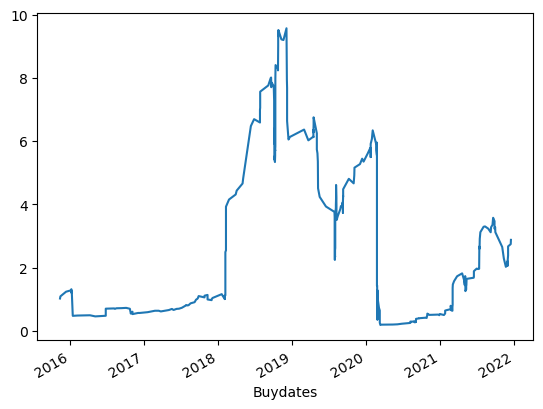

In [130]:
(sorted_df.profit+1).cumprod().plot()

In [131]:
arraycheck = sorted_df.Buydates.shift(-1)>sorted_df.Selldates#shifting this back by one row to check if buydates is greater than selldates

In [135]:
sorted_df['realtrade']=arraycheck.shift(1).fillna('True')

In [137]:
realtrade=sorted_df[sorted_df.realtrade==True]

In [139]:
realtrade.profit.min()

-0.6239463692731861

In [140]:
realtrade=realtrade[~(realtrade.profit==realtrade.profit.min())]

In [143]:
realtrade.profit.max()

0.34333023832875903

In [145]:
realtrade.profit.mean()

0.010598238342036237

In [146]:
(realtrade.profit+1).cumprod()

Buydates
2015-11-13    1.067061
2015-12-11    1.211747
2016-01-05    1.254848
2016-01-06    1.288415
2016-01-07    1.240132
                ...   
2021-11-30    4.493103
2021-12-01    4.682426
2021-12-03    5.001788
2021-12-16    5.135792
2021-12-17    5.388081
Name: profit, Length: 204, dtype: float64

<Axes: xlabel='Buydates'>

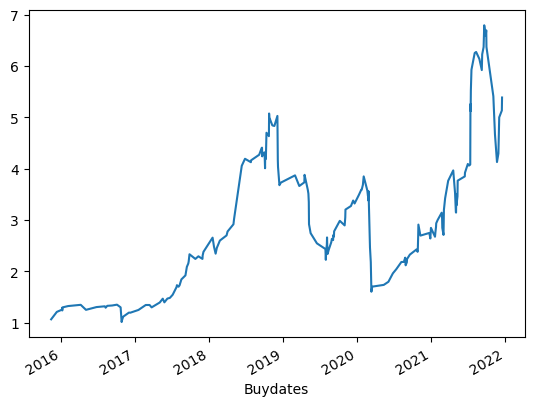

In [147]:
(realtrade.profit+1).cumprod().plot()